In [2]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
# from matplotlib import cm as cmapper

from astropy.coordinates import SkyCoord
from astropy.table import QTable, join
%matplotlib notebook

import seaborn as sns
pal = sns.color_palette("colorblind")

import pickle
from scipy.stats import norm
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [3]:
# Load Full Data
full_ideal_res = QTable.read("Data/FIT_AND_CLOUDY_RESULTS.fits")

with open("Data/COL_TEMPS.pkl", "rb") as f:
    col_temps = pickle.load(f)

In [4]:
# Observed Column Residuals
CII_obs_cloudy = full_ideal_res["MEAS_N_CII"]/full_ideal_res["N_CII"]
SiII_obs_cloudy = full_ideal_res["MEAS_N_SiII"]/full_ideal_res["N_SiII"]
AlII_obs_cloudy = full_ideal_res["MEAS_N_AlII"]/full_ideal_res["N_AlII"]
CIV_obs_cloudy = full_ideal_res["MEAS_N_CIV"]/full_ideal_res["N_CIV"]
SiIV_obs_cloudy = full_ideal_res["MEAS_N_SiIV"]/full_ideal_res["N_SiIV"]


# Normalized Column Residuals
CII_obs_cloudy_sig = (np.log10(full_ideal_res["MEAS_N_CII"].value)-np.log10(full_ideal_res["N_CII"].value))/(1/np.log(10) * 
                                                                                                             np.log10(full_ideal_res["MEAS_ERR_N_CII"].value)/
                                                                                                             np.log10(full_ideal_res["MEAS_N_CII"].value))

SiII_obs_cloudy_sig = (np.log10(full_ideal_res["MEAS_N_SiII"].value)-np.log10(full_ideal_res["N_SiII"].value))/(1/np.log(10) * 
                                                                                                             np.log10(full_ideal_res["MEAS_ERR_N_SiII"].value)/
                                                                                                             np.log10(full_ideal_res["MEAS_N_SiII"].value))


AlII_obs_cloudy_sig = (np.log10(full_ideal_res["MEAS_N_AlII"].value)-np.log10(full_ideal_res["N_AlII"].value))/(1/np.log(10) * 
                                                                                                             np.log10(full_ideal_res["MEAS_ERR_N_AlII"].value)/
                                                                                                             np.log10(full_ideal_res["MEAS_N_AlII"].value))

CIV_obs_cloudy_sig = (np.log10(full_ideal_res["MEAS_N_CIV"].value)-np.log10(full_ideal_res["N_CIV"].value))/(1/np.log(10) * 
                                                                                                             np.log10(full_ideal_res["MEAS_ERR_N_CIV"].value)/
                                                                                                             np.log10(full_ideal_res["MEAS_N_CIV"].value))

SiIV_obs_cloudy_sig = (np.log10(full_ideal_res["MEAS_N_SiIV"].value)-np.log10(full_ideal_res["N_SiIV"].value))/(1/np.log(10) * 
                                                                                                             np.log10(full_ideal_res["MEAS_ERR_N_SiIV"].value)/
                                                                                                             np.log10(full_ideal_res["MEAS_N_SiIV"].value))



CII_obs_cloudy_sig_masked = np.ma.masked_array(CII_obs_cloudy_sig, mask = full_ideal_res["MEAS_ERR_N_CII"].value == -1)
SiII_obs_cloudy_sig_masked = np.ma.masked_array(SiII_obs_cloudy_sig, mask = full_ideal_res["MEAS_ERR_N_SiII"].value == -1)
AlII_obs_cloudy_sig_masked = np.ma.masked_array(AlII_obs_cloudy_sig, mask = full_ideal_res["MEAS_ERR_N_AlII"].value == -1)

CIV_obs_cloudy_sig_masked = np.ma.masked_array(CIV_obs_cloudy_sig, mask = (full_ideal_res["MEAS_ERR_N_CIV"].value == -1)|np.isinf(CIV_obs_cloudy_sig))

SiIV_obs_cloudy_sig_masked = np.ma.masked_array(SiIV_obs_cloudy_sig, mask = (full_ideal_res["MEAS_ERR_N_SiIV"].value == -1)|np.isinf(CIV_obs_cloudy_sig))



/opt/homebrew/Caskroom/miniforge/base/envs/voigtfit/lib/python3.8/site-packages/astropy/units/quantity.py:614: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/var/folders/yk/6d2kh4j15294grmssy2gp_b40000gn/T/ipykernel_74128/3881036527.py:11: RuntimeWarning: invalid value encountered in log10
  np.log10(full_ideal_res["MEAS_ERR_N_CII"].value)/
/var/folders/yk/6d2kh4j15294grmssy2gp_b40000gn/T/ipykernel_74128/3881036527.py:15: RuntimeWarning: invalid value encountered in log10
  np.log10(full_ideal_res["MEAS_ERR_N_SiII"].value)/
/var/folders/yk/6d2kh4j15294grmssy2gp_b40000gn/T/ipykernel_74128/3881036527.py:20: RuntimeWarning: invalid value encountered in log10
  np.log10(full_ideal_res["MEAS_ERR_N_AlII"].value)/
/var/folders/yk/6d2kh4j15294grmssy2gp_b40000gn/T/ipykernel_74128/3881036527.py:23: RuntimeWarning: divide by zero encountered in log10
  CIV_obs_cloudy_sig = (np.log10(full_ideal_res["MEAS_N_CIV"].va

In [5]:

data_temp = {}


logt4 = np.ma.masked_array(data = np.log10(full_ideal_res["Te"].value.newbyteorder().byteswap()))
logt4.mask = np.isnan(logt4)
logt4.mask = np.isinf(logt4)
logt4.mask = logt4 < 2

data_temp["Photoionized"] = logt4


tdp4 = np.percentile(logt4[~logt4.mask],(16,50,84))
t4,tp4,tn4 = tdp4[1],tdp4[2]-tdp4[1],tdp4[1]-tdp4[0]

data_temp_master2 = {r"$\log_{10}(T/K)$":np.ma.concatenate([col_temps["CIE_T"], 
                                                        col_temps["ISOCh_T"], 
                                                        data_temp["Photoionized"]]),
                   "Ionization Model":np.concatenate([[r"Equilibrium"]*len(col_temps["CIE_T"]), 
                                           [r"Nonequilibrium"]*len(col_temps["ISOCh_T"]),
                                                     [r"Photoionized"]*len(data_temp["Photoionized"]),])}


### Line Widths

In [6]:
masked_CIV_b = np.ma.masked_array(full_ideal_res["B_CIV"].value, 
                                  mask = (np.isnan(full_ideal_res["B_CIV"]) | 
                                          (full_ideal_res["ERR_B_CIV"] > .5 * full_ideal_res["B_CIV"]))).newbyteorder().byteswap() 

masked_CIV_b_err = np.ma.masked_array(full_ideal_res["ERR_B_CIV"].value, 
                                  mask = (np.isnan(full_ideal_res["B_CIV"]) | 
                                          (full_ideal_res["ERR_B_CIV"] > .5 * full_ideal_res["B_CIV"]))).newbyteorder().byteswap() 

masked_CII_b = np.ma.masked_array(full_ideal_res["B_CII"].value, 
                                  mask = (np.isnan(full_ideal_res["B_CII"]) | 
                                          (full_ideal_res["ERR_B_CII"] > .5 * full_ideal_res["B_CII"]))).newbyteorder().byteswap() 

masked_CII_b_err = np.ma.masked_array(full_ideal_res["ERR_B_CII"].value, 
                                  mask = (np.isnan(full_ideal_res["B_CII"]) | 
                                          (full_ideal_res["ERR_B_CII"] > .5 * full_ideal_res["B_CII"]))).newbyteorder().byteswap() 

masked_SiIV_b = np.ma.masked_array(full_ideal_res["B_SiIV"].value, 
                                  mask = (np.isnan(full_ideal_res["B_SiIV"]) | 
                                          (full_ideal_res["ERR_B_SiIV"] > .5 * full_ideal_res["B_SiIV"]))).newbyteorder().byteswap() 

masked_SiIV_b_err = np.ma.masked_array(full_ideal_res["ERR_B_SiIV"].value, 
                                  mask = (np.isnan(full_ideal_res["B_SiIV"]) | 
                                          (full_ideal_res["ERR_B_SiIV"] > .5 * full_ideal_res["B_SiIV"]))).newbyteorder().byteswap() 

masked_SiII_b = np.ma.masked_array(full_ideal_res["B_SiII"].value, 
                                  mask = (np.isnan(full_ideal_res["B_SiII"]) | 
                                          (full_ideal_res["ERR_B_SiII"] > .5 * full_ideal_res["B_SiII"]))).newbyteorder().byteswap() 

masked_SiII_b_err = np.ma.masked_array(full_ideal_res["ERR_B_SiII"].value, 
                                  mask = (np.isnan(full_ideal_res["B_SiII"]) | 
                                          (full_ideal_res["ERR_B_SiII"] > .5 * full_ideal_res["B_SiII"]))).newbyteorder().byteswap() 

masked_OVI_b = np.ma.masked_array(full_ideal_res["B_OVI"], 
                                  mask = (np.isnan(full_ideal_res["B_OVI"]) | 
                                          (full_ideal_res["ERR_B_OVI"] > .5 * full_ideal_res["B_OVI"]))).newbyteorder().byteswap() 

In [7]:
CIV_CII_b_ratio = masked_CIV_b / masked_CII_b
CIV_CII_b_ratio_err = np.sqrt((masked_CIV_b_err/masked_CIV_b)**2 + (masked_CII_b_err/masked_CII_b)**2)

SiIV_SiII_b_ratio = masked_SiIV_b / masked_SiII_b
SiIV_SiII_b_ratio_err = np.sqrt((masked_SiIV_b_err/masked_SiIV_b)**2 + (masked_SiII_b_err/masked_SiII_b)**2)

C_diff = masked_CIV_b - masked_CII_b
C_diff_err = np.sqrt(masked_CIV_b_err**2 + masked_CII_b_err**2)

Si_diff = masked_SiIV_b - masked_SiII_b
Si_diff_err = np.sqrt(masked_SiIV_b_err**2 + masked_SiII_b_err**2)

C_diff_arr = C_diff + C_diff_err * np.random.randn(1000)[:,None]
Si_diff_arr = Si_diff + Si_diff_err * np.random.randn(1000)[:,None]



In [8]:
# Stat Tests

from scipy.stats import wilcoxon
from seaborn.algorithms import bootstrap


def boot_wilcoxon_Si(inds):
    x = Si_diff[inds] + Si_diff_err[inds] * np.random.randn(len(inds))
    
    return wilcoxon(x[~x.mask])

wilcoxon_Si = bootstrap(np.arange(len(Si_diff)), func = boot_wilcoxon_Si, nboot = 10000)

def boot_wilcoxon_C(inds):
    x = C_diff[inds] + C_diff_err[inds] * np.random.randn(len(inds))
    
    return wilcoxon(x[~x.mask])

wilcoxon_C = bootstrap(np.arange(len(C_diff)), func = boot_wilcoxon_C, nboot = 10000)


In [9]:
print("Si:", np.percentile(wilcoxon_Si[:,1], (16,50,84)))
 
print("C:", np.percentile(wilcoxon_C[:,1], (16,50,84)))

Si: [0.00463867 0.05065918 0.31188053]
C: [0.02041245 0.16015625 0.61122131]


In [16]:
.16 - .611

-0.45099999999999996

### Centroid Velocity

In [11]:
C_vel_diff = full_ideal_res["MEAS_V_CIV"] - full_ideal_res["MEAS_V_CII"]
Si_vel_diff = full_ideal_res["MEAS_V_SiIV"] - full_ideal_res["MEAS_V_SiIII"]


C_vel_diff_err = np.sqrt(full_ideal_res["MEAS_ERR_V_CII"]**2 + full_ideal_res["MEAS_ERR_V_CIV"]**2)
Si_vel_diff_err = np.sqrt(full_ideal_res["MEAS_ERR_V_SiIII"]**2 + full_ideal_res["MEAS_ERR_V_SiIV"]**2)


OVI_SiIII_vel_diff = full_ideal_res["MEAS_V_OVI"] - full_ideal_res["MEAS_V_SiIII"]
OVI_SiIII_vel_diff_err = np.sqrt(full_ideal_res["MEAS_ERR_V_OVI"]**2 + full_ideal_res["MEAS_ERR_V_SiIII"]**2)

OVI_CIV_vel_diff = full_ideal_res["MEAS_V_OVI"] - full_ideal_res["MEAS_V_CIV"]
OVI_CIV_vel_diff_err = np.sqrt(full_ideal_res["MEAS_ERR_V_OVI"]**2 + full_ideal_res["MEAS_ERR_V_CIV"]**2)

OVI_SiIII_vel_diff = OVI_SiIII_vel_diff[~np.isnan(OVI_SiIII_vel_diff)]
OVI_SiIII_vel_diff_err = OVI_SiIII_vel_diff_err[~np.isnan(OVI_SiIII_vel_diff_err)]

OVI_CIV_vel_diff = OVI_CIV_vel_diff[~np.isnan(OVI_CIV_vel_diff)]
OVI_CIV_vel_diff_err = OVI_CIV_vel_diff_err[~np.isnan(OVI_CIV_vel_diff_err)]



In [12]:
# Stat Tests

from scipy.stats import wilcoxon
from seaborn.algorithms import bootstrap


def boot_wilcoxon_Si(inds):
    x = Si_vel_diff[inds] + Si_vel_diff_err[inds] * np.random.randn(len(inds))
    
    return wilcoxon(x[~np.isnan(x)])

wilcoxon_Si = bootstrap(np.arange(len(Si_vel_diff)), func = boot_wilcoxon_Si, nboot = 10000)

def boot_wilcoxon_C(inds):
    x = C_vel_diff[inds] + C_vel_diff_err[inds] * np.random.randn(len(inds))
    
    return wilcoxon(x[~np.isnan(x)])

wilcoxon_C = bootstrap(np.arange(len(C_vel_diff)), func = boot_wilcoxon_C, nboot = 10000)

def boot_wilcoxon_O_low(inds):
    x = OVI_SiIII_vel_diff[inds] + OVI_SiIII_vel_diff_err[inds] * np.random.randn(len(inds))
    
    return wilcoxon(x[~np.isnan(x)])

wilcoxon_O_low = bootstrap(np.arange(len(OVI_SiIII_vel_diff)), func = boot_wilcoxon_O_low, nboot = 10000)

def boot_wilcoxon_O_high(inds):
    x = OVI_CIV_vel_diff[inds] + OVI_CIV_vel_diff_err[inds] * np.random.randn(len(inds))
    
    return wilcoxon(x[~np.isnan(x)])

wilcoxon_O_high = bootstrap(np.arange(len(OVI_CIV_vel_diff)), func = boot_wilcoxon_O_high, nboot = 10000)


def boot_width_O_low(inds):
    return np.std(OVI_SiIII_vel_diff[inds].value + OVI_SiIII_vel_diff_err[inds].value * np.random.randn(len(inds)))

def boot_width_O_high(inds):
    return np.std(OVI_CIV_vel_diff[inds].value + OVI_CIV_vel_diff_err[inds].value * np.random.randn(len(inds)))


def boot_width_C(inds):
    return np.nanstd(C_vel_diff[inds].value + C_vel_diff_err[inds].value * np.random.randn(len(inds)))

def boot_width_Si(inds):
    return np.nanstd(Si_vel_diff[inds].value + Si_vel_diff_err[inds].value * np.random.randn(len(inds)))

width_O_high = bootstrap(np.arange(len(OVI_CIV_vel_diff)), func = boot_width_O_high, nboot = 10000)
width_O_low = bootstrap(np.arange(len(OVI_SiIII_vel_diff)), func = boot_width_O_low, nboot = 10000)
width_C = bootstrap(np.arange(len(C_vel_diff)), func = boot_width_C, nboot = 10000)
width_Si = bootstrap(np.arange(len(Si_vel_diff)), func = boot_width_Si, nboot = 10000)





In [13]:
print("Si:", np.percentile(wilcoxon_Si[:,1], (16,50,84)))

print("C:", np.percentile(wilcoxon_C[:,1], (16,50,84)))

print("O to low-ion:", np.percentile(wilcoxon_O_low[:,1], (16,50,84)))

print("O to high-ion:", np.percentile(wilcoxon_O_high[:,1], (16,50,84)))


print("C Width:", np.percentile(width_C, (16,50,84)))

print("Si Width:", np.percentile(width_Si, (16,50,84)))

print("O to low-ion Width:", np.percentile(width_O_low, (16,50,84)))

print("O to high-ion Width:", np.percentile(width_O_high, (16,50,84)))



Si: [0.04785698 0.29440975 0.743326  ]
C: [0.05641158 0.3219418  0.75660133]
O to low-ion: [0.0479126  0.27685547 0.76153564]
O to high-ion: [0.04248047 0.23339844 0.73339844]
C Width: [13.35359493 15.85480173 19.32822113]
Si Width: [11.70614206 13.52452862 15.6237321 ]
O to low-ion Width: [17.62741012 22.4946801  29.53790176]
O to high-ion Width: [15.76519681 21.6292019  32.41676356]


In [17]:
resid_data = {"resid":np.ma.concatenate([CII_obs_cloudy_sig_masked,
                                         SiII_obs_cloudy_sig_masked, 
                                         AlII_obs_cloudy_sig_masked, 
                                         CIV_obs_cloudy_sig_masked,
                                         SiIV_obs_cloudy_sig_masked]),
              "Ion":np.concatenate([["CII"]*len(CII_obs_cloudy_sig_masked), 
                                    ["SiII"]*len(SiII_obs_cloudy_sig_masked), 
                                    ["AlII"]*len(AlII_obs_cloudy_sig_masked),
                                    ["CIV"]*len(CIV_obs_cloudy_sig_masked),
                                    ["SiIV"]*len(SiIV_obs_cloudy_sig_masked)])}

# Extended Data Figure 4

<IPython.core.display.Javascript object>


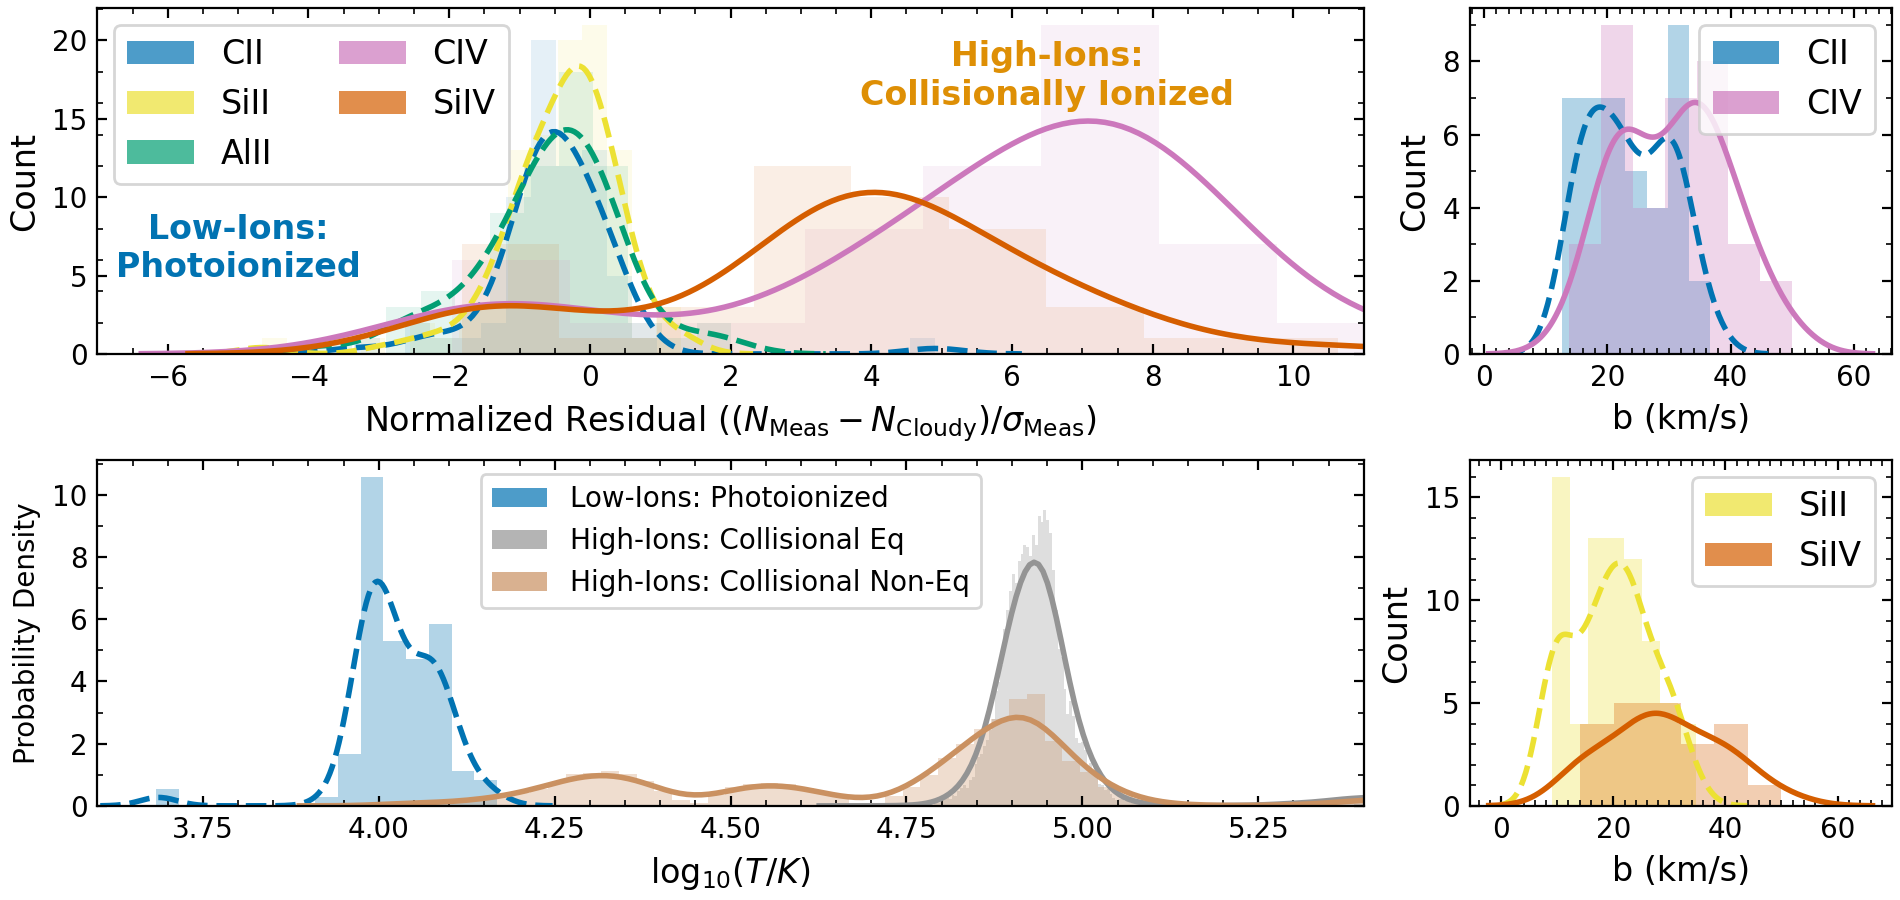

In [18]:

fig = plt.figure(constrained_layout=True, figsize = (9.5,4.5))
mosaic = """
    AAAB
    DDDC
"""
axs = fig.subplot_mosaic(mosaic)



# fig,ax = plt.subplots()
ax = axs["A"]

sns.histplot(x = CII_obs_cloudy_sig_masked, color = pal[0], alpha = 0.1, kde = True, stat = "count",
            label = "CII", ax = ax, 
             fill = True, lw = 0, kde_kws = {"cut":3})

sns.histplot(x = SiII_obs_cloudy_sig_masked, color = pal[8], alpha = 0.1, kde = True, stat = "count",
            label = "SiII", ax = ax, 
             fill = True, lw = 0, kde_kws = {"cut":3})


sns.histplot(x = AlII_obs_cloudy_sig_masked, color = pal[2], alpha = 0.1, kde = True, stat = "count",
            label = "AlII", ax = ax, 
             fill = True, lw = 0, kde_kws = {"cut":3})

[line.set_linestyle("--") for line in ax.lines] 



sns.histplot(x = CIV_obs_cloudy_sig_masked, color = pal[4], alpha = 0.1, kde = True, stat = "count",
            label = "CIV", ax = ax, 
             fill = True, lw = 0, kde_kws = {"cut":3})


sns.histplot(x = SiIV_obs_cloudy_sig_masked, color = pal[3], alpha = 0.1, kde = True, stat = "count",
            label = "SiIV", ax = ax, 
             fill = True, lw = 0, kde_kws = {"cut":3})

[line.set_linewidth(2) for line in ax.lines] 

# sns.kdeplot(x=CII_obs_cloudy_sig_masked, ax = ax, color = pal[0], alpha = 0.3, label = "CII", 
#             lw = 2, shade = True, ls = "--")
# sns.kdeplot(x=SiII_obs_cloudy_sig_masked, ax = ax, color = pal[8], alpha = 0.3, label = "SiII", 
#             lw = 2, shade = True, ls = "--")
# sns.kdeplot(x=AlII_obs_cloudy_sig_masked, ax = ax, color = pal[2], alpha = 0.3, label = "AlII", 
#             lw = 2, shade = True, ls = "--")

# sns.kdeplot(x=CIV_obs_cloudy_sig_masked, ax = ax, color = pal[4], alpha = 0.3, label = "CIV", 
#             lw = 2, shade = True, ls = "-")
# sns.kdeplot(x=SiIV_obs_cloudy_sig_masked, ax = ax, color = pal[3], alpha = 0.3, label = "SiIV", 
#             lw = 2, shade = True, ls = "-")

xlim = ax.set_xlim(-7,11)




lg = ax.legend(fontsize = 12, ncol = 2)

for lh in lg.legendHandles: 
    lh.set_alpha(0.7)
# 

# ax.axvline(2, color = "k", ls = "--", lw = 2)

ax.text(6.5,20,"High-Ions:\nCollisionally Ionized", fontsize = 12, fontweight = "bold", color = pal[1],
        ha = "center", va = "top")
# # ax.arrow(1.75,0.46,5,0, head_width = .02, head_length = .5, color = "k")

ax.text(-5,9,"Low-Ions:\nPhotoionized", ha = "center", va = "top", 
        fontsize = 12, color = pal[0], fontweight = "bold")

ax.set_xlabel(r"Normalized Residual ($(N_\mathrm{Meas} - N_\mathrm{Cloudy})/\sigma_\mathrm{Meas}$)", 
              fontsize = 12)

ax.set_ylabel("Count", fontsize = 12)



# sns.histplot(data = data_temp_master2, x = r"$\log_{10}(T/K)$", hue = "Ionization Model", 
#             palette = [pal[7], pal[5], pal[0]], alpha = 0.4, lw = 1, kde = True, 
#              stat = "probability", binwidth = 0.05, line_kws = {"lw":2}, ax = axs["D"])

# tkde = sns.kdeplot(data = data_temp_master2, x = r"$\log_{10}(T/K)$", hue = "Ionization Model", 
#             palette = [pal[7], pal[5], pal[0]], alpha = 0.4, 
#              ax = axs["D"], lw = 2, shade = True, legend = False)

# sns.kdeplot(x = data_temp["CIE"], color = pal[7], shade = True, ls = "-", lw = 2, alpha = 0.3, 
#             label = "High Ions: Colissional Equilibrium", ax = axs["D"])



sns.histplot(x = data_temp["Photoionized"], color = pal[0], alpha = 0.3, kde = "True", stat = "density",
            label = "Low-Ions: Photoionized", ax = axs["D"], 
             fill = True, lw = 0, kde_kws = {"cut":3})

[line.set_linestyle("--") for line in axs["D"].lines] 

sns.histplot(x = col_temps["CIE_T"], color = pal[7], alpha = 0.3, kde = True, stat = "density",
            label = "High-Ions: Collisional Eq", ax = axs["D"], 
             fill = True, lw = 0, kde_kws = {"cut":3})

sns.histplot(x = col_temps["ISOCh_T"], color = pal[5], alpha = 0.3, kde = "True", stat = "density",
            label = "High-Ions: Collisional Non-Eq", ax = axs["D"], 
             fill = True, lw = 0, kde_kws = {"cut":3})

axs['D'].set_xlim(3.6,5.4)

[line.set_linewidth(2) for line in axs["D"].lines] 
# sns.kdeplot(x = data_temp["Isochoric"], color = pal[5], shade = True, ls = "-", lw = 2, alpha = 0.3, 
#             label = "High Ions: Colissional Nonequilibrium", ax = axs["D"])

# sns.kdeplot(x = data_temp["Photoionized"], color = pal[0], shade = True, ls = "--", lw = 2, alpha = 0.3, 
#             label = "Low Ions: Photoionized", ax = axs["D"])

leg = axs["D"].legend(loc = "best")
for lh in leg.legendHandles: 
    lh.set_alpha(0.7)
# axs["D"].set_ylim(0,0.6)

# axs["D"].legend(labels = ['Low Ions: Photoionized',
#                           'High Ions: Colissional Nonequilibrium',
#                           'High Ions: Colissional Equilibrium'], 
#                 title = "Ionization Model", bbox_to_anchor = (0.81,1))

# sns.kdeplot(data = data_temp_master, x = r"$\log_{10}(T/K)$", hue = "Colissional Model", 
#             palette = [pal[7], pal[6], pal[5]], alpha = 0.4, lw = 1, shade = True, 
#             multiple = "layer")

axs["D"].set_xlabel(r"$\log_{10}(T/K)$", fontsize = 12)
axs["D"].set_ylabel("Probability Density", fontsize = 10)


# sns.kdeplot(x= masked_SiII_b, color = pal[8], ax = axs["C"], 
#             shade = True, ls = "--", lw = 2, label = "SiII")
# sns.kdeplot(x= masked_SiIV_b, color = pal[3], ax = axs["C"], 
#             shade = True, lw = 2, label = "SiIV")

# axs["C"].legend(fontsize = 12)

sns.histplot(x = masked_SiII_b, color = pal[8], 
             alpha = 0.3, kde = "True", stat = "count",
            label = "SiII", ax = axs["C"], 
             fill = True, lw = 0, kde_kws = {"cut":3})

[line.set_linestyle("--") for line in axs["C"].lines] 

sns.histplot(x = masked_SiIV_b, color = pal[3], 
             alpha = 0.3, kde = "True", stat = "count",
            label = "SiIV", ax = axs["C"], 
             fill = True, lw = 0, kde_kws = {"cut":3})

[line.set_linewidth("2") for line in axs["C"].lines] 


leg = axs["C"].legend(fontsize = 12)

for lh in leg.legendHandles: 
    lh.set_alpha(0.7)

sns.histplot(x = masked_CII_b, color = pal[0], 
             alpha = 0.3, kde = "True", stat = "count",
            label = "CII", ax = axs["B"], 
             fill = True, lw = 0, kde_kws = {"cut":3})

[line.set_linestyle("--") for line in axs["B"].lines] 

sns.histplot(x = masked_CIV_b, color = pal[4], 
             alpha = 0.3, kde = "True", stat = "count",
            label = "CIV", ax = axs["B"], 
             fill = True, lw = 0, kde_kws = {"cut":3})

[line.set_linewidth("2") for line in axs["B"].lines] 



leg = axs["B"].legend(fontsize = 12)
for lh in leg.legendHandles: 
    lh.set_alpha(0.7)

for ax in [axs["B"],axs["C"]]:
    ax.set_ylabel("Count", fontsize = 12)
#     ax.yaxis.tick_right()
#     ax.set_ylabel(None)
    ax.set_xlabel("b (km/s)", fontsize = 12)
    
# for ax in [axs["A"],axs["D"]]:
# #     ax.set_ylabel("Probability", fontsize = 12)
#     ax.yaxis.tick_right()
#     ax.yaxis.set_label_position("right")

axs["A"].xaxis.set_minor_locator(MultipleLocator(0.5))
axs["A"].yaxis.set_minor_locator(MultipleLocator(2))
axs["A"].tick_params(which = "both", direction = "in", top = True, right = True)

axs["D"].xaxis.set_minor_locator(MultipleLocator(0.05))
axs["D"].yaxis.set_minor_locator(MultipleLocator(1))
axs["D"].tick_params(which = "both", direction = "in", top = True, right = True)

axs["B"].xaxis.set_minor_locator(MultipleLocator(2))
axs["B"].yaxis.set_minor_locator(MultipleLocator(1))
axs["B"].tick_params(which = "both", direction = "in", top = True, right = True)

axs["C"].xaxis.set_minor_locator(MultipleLocator(2))
axs["C"].yaxis.set_minor_locator(MultipleLocator(1))
axs["C"].tick_params(which = "both", direction = "in", top = True, right = True)

    


# Extended Data Figure 5

<IPython.core.display.Javascript object>


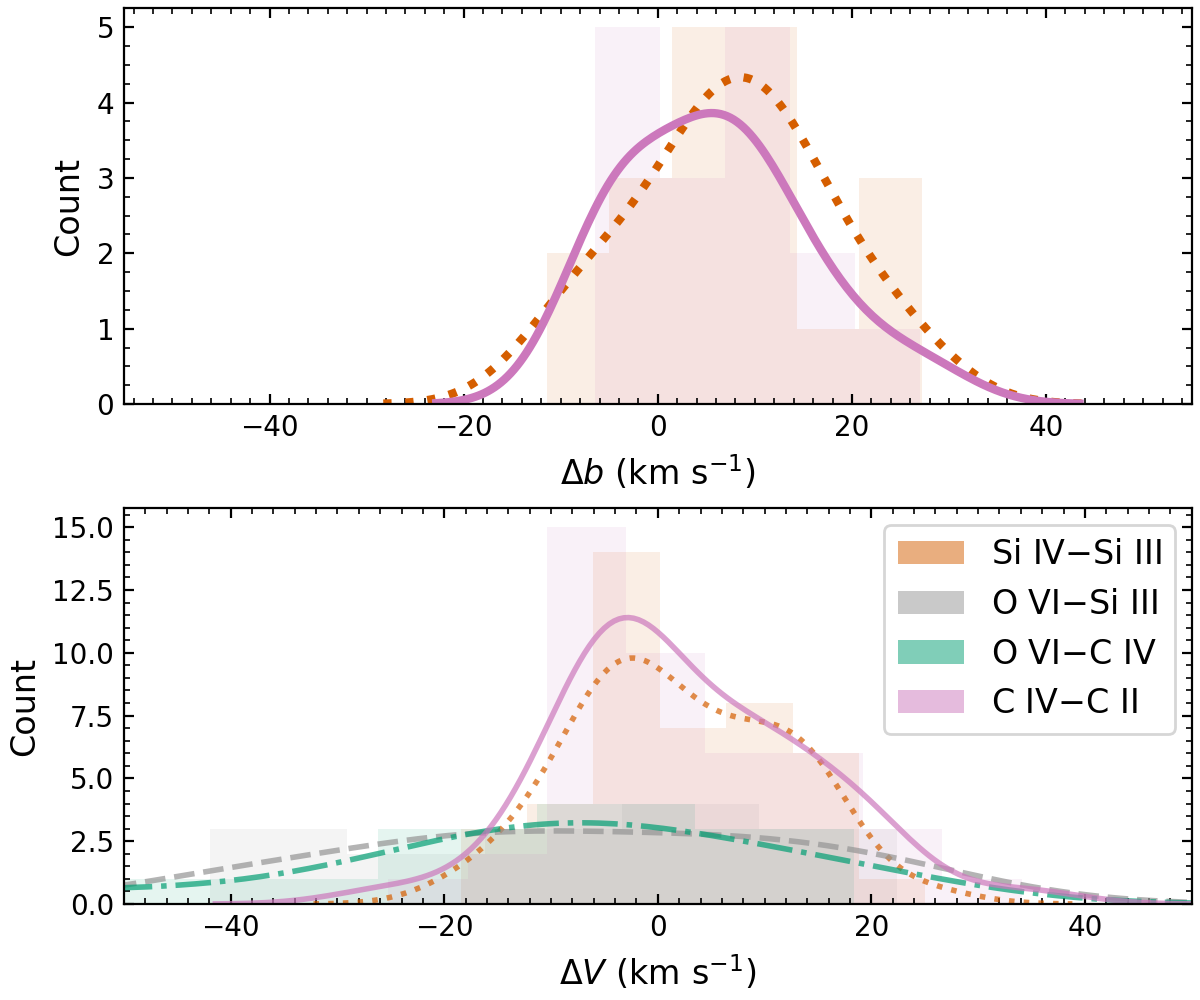

In [19]:
fig,axs = plt.subplots(2,1,constrained_layout = True, figsize = (6,5))

axs = {"B":axs[0], "C":axs[1]}


palette = [pal[3], pal[4]]

sns.histplot(x = Si_vel_diff, kde = True, color = palette[0], alpha = 0.1,
             fill = True, lw = 0, kde_kws = {"cut":3}, label = r"Si IV$-$Si III", ax = axs["C"])



[line.set_linestyle(":") for line in axs["C"].lines] 


sns.histplot(x = OVI_SiIII_vel_diff, kde = True, color = pal[7], alpha = 0.1,
             fill = True, lw = 0, kde_kws = {"cut":3}, label = r"O VI$-$Si III", ax = axs["C"])
[line.set_linestyle("--") for line in axs["C"].lines[1:]] 

sns.histplot(x = OVI_CIV_vel_diff, kde = True, color = pal[2], alpha = 0.1,
             fill = True, lw = 0, kde_kws = {"cut":3}, label = r"O VI$-$C IV", ax = axs["C"])
[line.set_linestyle("-.") for line in axs["C"].lines[2:]] 


sns.histplot(x = C_vel_diff, kde = True, color = palette[1], alpha = 0.1,
             fill = True, lw = 0, kde_kws = {"cut":3}, label = r"C IV$-$C II", ax = axs["C"])




[line.set_linewidth(2) for line in axs["C"].lines] 
[line.set_alpha(0.7) for line in axs["C"].lines] 




OVI_SiIII_vel_diff


_ = axs["C"].set_xlabel(r"$\Delta V~(\mathrm{km~s}^{-1})$", fontsize = 12)


# for lh in leg.legendHandles: 
#     lh.set_alpha(0.5)
    
axs["C"].set_xlim(-50,50)


    
sns.histplot(x = Si_diff, kde = True, color = palette[0], alpha = 0.1,
             fill = True, lw = 0, kde_kws = {"cut":3}, 
             label = r"Si IV$-$Si III", 
             stat = "count", ax = axs["B"])

[line.set_linestyle(":") for line in axs["B"].lines] 

sns.histplot(x = C_diff, kde = True, color = palette[1], alpha = 0.1,
             fill = True, lw = 0, kde_kws = {"cut":3}, 
             label = r"C IV$-$C II",  
             stat = "count", ax = axs["B"])
[line.set_linewidth(3) for line in axs["B"].lines] 

_ = axs["B"].set_xlabel(r"$\Delta b~(\mathrm{km~s}^{-1})$", fontsize = 12)


_ = axs["B"].set_ylabel("Count", fontsize = 12)
_ = axs["C"].set_ylabel("Count", fontsize = 12)
axs["B"].set_xlim(-55,55)



leg = axs["C"].legend(fontsize = 12)
for lh in leg.legendHandles: 
    lh.set_alpha(0.5)
    
axs["B"].xaxis.set_minor_locator(MultipleLocator(2))
axs["B"].yaxis.set_minor_locator(MultipleLocator(0.25))
axs["B"].tick_params(which = "both", direction = "in", top = True, right = True)

axs["C"].xaxis.set_minor_locator(MultipleLocator(2))
axs["C"].yaxis.set_minor_locator(MultipleLocator(0.5))
axs["C"].tick_params(which = "both", direction = "in", top = True, right = True)
    
    


In [20]:
target_v_mask = full_ideal_res["MEAS_V_CIV"] > 150*u.km/u.s
target_v_mask |= full_ideal_res["MEAS_V_SiIV"] > 150*u.km/u.s

In [21]:
vres = full_ideal_res[target_v_mask]

In [22]:
vres

SOURCE,RHO_LMC,COMP_NUM,MEAN_HIGH_V,MEAS_V_CIV,MEAS_ERR_V_CIV,MEAS_N_CIV,MEAS_ERR_N_CIV,B_CIV,ERR_B_CIV,MEAS_V_SiIV,MEAS_ERR_V_SiIV,MEAS_N_SiIV,MEAS_ERR_N_SiIV,B_SiIV,ERR_B_SiIV,MEAS_V_OVI,MEAS_ERR_V_OVI,MEAS_N_OVI,MEAS_ERR_N_OVI,B_OVI,ERR_B_OVI,MEAN_LOW_V,MEAS_V_CII,MEAS_ERR_V_CII,MEAS_N_CII,MEAS_ERR_N_CII,B_CII,ERR_B_CII,MEAS_V_SiII,MEAS_ERR_V_SiII,MEAS_N_SiII,MEAS_ERR_N_SiII,B_SiII,ERR_B_SiII,MEAS_V_SiIII,MEAS_ERR_V_SiIII,MEAS_N_SiIII,MEAS_ERR_N_SiIII,B_SiIII,ERR_B_SiIII,MEAS_V_AlII,MEAS_ERR_V_AlII,MEAS_N_AlII,MEAS_ERR_N_AlII,B_AlII,ERR_B_AlII,MEAS_V_FeII,MEAS_ERR_V_FeII,MEAS_N_FeII,MEAS_ERR_N_FeII,B_FeII,ERR_B_FeII,MEAS_V_OI,MEAS_ERR_V_OI,MEAS_N_OI,MEAS_ERR_N_OI,B_OI,ERR_B_OI,n_H,PHI(H),N_HI,N_HII,N_SiII,N_SiIII,N_SiIV,N_CII,N_CIV,N_FeII,N_AlII,N_NI,N_SII,N_OI,N_OVI,Te,STOP_COL_REACHED,bg_n_H,bg_PHI(H),bg_N_HI,bg_N_HII,bg_N_SiII,bg_N_SiIII,bg_N_SiIV,bg_N_CII,bg_N_CIV,bg_N_FeII,bg_N_AlII,bg_N_NI,bg_N_SII,bg_N_OI,bg_N_OVI,bg_Te,bg_STOP_COL_REACHED
,kpc,,km / s,km / s,km / s,1 / cm2,1 / cm2,km / s,km / s,km / s,km / s,1 / cm2,1 / cm2,km / s,km / s,km / s,km / s,1 / cm2,1 / cm2,km / s,km / s,km / s,km / s,km / s,1 / cm2,1 / cm2,km / s,km / s,km / s,km / s,1 / cm2,1 / cm2,km / s,km / s,km / s,km / s,1 / cm2,1 / cm2,km / s,km / s,km / s,km / s,1 / cm2,1 / cm2,km / s,km / s,km / s,km / s,1 / cm2,1 / cm2,km / s,km / s,km / s,km / s,1 / cm2,1 / cm2,km / s,km / s,1 / cm3,ph / s,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,K,,1 / cm3,ph / s,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,K,
bytes23,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool
1H0419-577,12.486540411593717,5,311.3926867981198,311.3926867981198,1.2441051127653133,35253143168375.836,2514095669599.2656,24.058009191376968,2.1326604497028097,311.3926867981198,1.2441051166719028,5346526902066.543,686082125362.6395,14.277918677622548,2.6619559244839945,301.6122021278929,6.667998622207498,106131677818202.19,31089922050860.027,16.4715948425997,8.395795918259788,325.5350401497468,315.01274437893863,0.8050795900761774,79574137999387.92,6687538158709.308,14.951045732022937,1.3448844477220816,315.01274437893863,0.8050795896785092,4869814241081.894,347817628908.0548,16.67440457906782,1.4597198040547066,315.01274437893863,0.0,13125262632204.668,860224022858.0658,16.67440457906782,1.4597198077364357,357.1019274621714,0.0,571265732298.6941,843047219150.5366,nan,nan,nan,nan,6155497460491.588,-1.0,nan,nan,nan,nan,17091927573066.26,-1.0,nan,nan,0.018921693353828553,159342.63695087915,3.45115e+16,2.58218e+18,6558350000000.0,12670400000000.0,171587000000.0,69873600000000.0,154597000000.0,1260440000000.0,1416410000000.0,293924000000.0,4070410000000.0,3697390000000.0,56270.9,12416.523075924119,True,0.1856312119051715,40830.5283724255,2.66013e+17,5.54945e+17,5940530000000.0,117483000000.0,279398000.0,39371100000000.0,0.0,4482950000000.0,509878000000.0,4000480000000.0,3022300000000.0,32136700000000.0,0.0,16255.48755750485,True
1H0419-577,12.486540411593717,6,355.60668391861225,355.60668391861225,3.076410049433923,12170021711796.352,2568451806752.5796,19.666135743466555,0.09494044104020019,355.60668391861225,3.0764100505289,4472962420325.755,801011132547.7308,28.580473860167423,6.731245593188162,358.284157887841

In [27]:
for v,ve in zip(vres["B_SiIV"][np.argsort(vres["RHO_LMC"])].value, 
                    vres["ERR_B_SiIV"][np.argsort(vres["RHO_LMC"])].value):
    
    if np.isnan(v):
        print("---")
    elif ve/v > 0.7:
        print(f"${v:.0f}$")
    else:
        print(f"${v:.0f} \pm {ve:.0f}$")

$42 \pm 20$
$39 \pm 15$
$40 \pm 11$
---
$9$
---
---
---
$34$
---
$44 \pm 25$
$43$
$16 \pm 3$
$23$
$30$
$10$
$36$
$32 \pm 6$
---
---
$40 \pm 22$
$30 \pm 16$
$38 \pm 16$
---
$27 \pm 6$
$26 \pm 11$
$20$
$27$
$50 \pm 8$
$31 \pm 17$
$31 \pm 19$
$14 \pm 3$
$29 \pm 7$
$32 \pm 11$
---
$29 \pm 16$
---
---
$24$
$9$
$15 \pm 6$
---
---
$24 \pm 5$
$12$
$20 \pm 5$
---
$25 \pm 10$
$12$
$14 \pm 5$
$11$
$9 \pm 6$


In [101]:
for v,ve, v2, v2e in zip(np.log10(vres["MEAS_N_CIV"][np.argsort(vres["RHO_LMC"])].value), 
                1/np.log(10) * vres["MEAS_ERR_N_CIV"][np.argsort(vres["RHO_LMC"])]/vres["MEAS_N_CIV"][np.argsort(vres["RHO_LMC"])],
                        np.log10(vres["MEAS_N_SiIV"][np.argsort(vres["RHO_LMC"])].value), 
                1/np.log(10) * vres["MEAS_ERR_N_SiIV"][np.argsort(vres["RHO_LMC"])]/vres["MEAS_N_SiIV"][np.argsort(vres["RHO_LMC"])]):
    rat = v - v2
    rat_err = np.sqrt(ve**2 + v2e**2)
    if np.isnan(v) | np.isnan(v2):
        print("---")
    elif (ve < 0) & (v2e > 0):
        print(f"$<{rat:.2f}$")
    elif (ve > 0) & (v2e < 0):
        print(f"$>{rat:.2f}$")
    elif (ve < 0) & (v2e < 0):
        print("---")
    else:
        print(f"${rat:.2f} \pm {rat_err.value:.2f}$")

$0.33 \pm 0.38$
$0.66 \pm 0.20$
$0.33 \pm 0.28$
$>1.01$
$0.89 \pm 0.32$
$>0.96$
$>1.25$
$>0.98$
$0.69 \pm 2.33$
$>0.87$
$0.64 \pm 0.33$
$0.92 \pm 0.70$
$0.74 \pm 0.11$
$1.17 \pm 0.96$
$0.82 \pm 0.47$
$<0.41$
$0.66 \pm 0.97$
$0.02 \pm 0.59$
$>0.77$
$>0.46$
$0.92 \pm 0.61$
$0.51 \pm 0.80$
$0.63 \pm 0.56$
$>0.93$
$0.40 \pm 0.18$
$0.51 \pm 0.52$
$0.69 \pm 0.82$
$0.28 \pm 0.80$
$0.18 \pm 1.02$
$0.57 \pm 0.79$
$0.55 \pm 0.83$
$0.82 \pm 0.06$
$0.43 \pm 0.12$
$0.84 \pm 0.15$
$>1.14$
$0.52 \pm 0.27$
$>0.35$
$>1.01$
$0.59 \pm 0.83$
$0.51 \pm 0.72$
$0.30 \pm 0.10$
$>0.64$
$>1.07$
$0.08 \pm 0.29$
$0.96 \pm 0.19$
$0.55 \pm 0.15$
$>0.92$
$<0.08$
$<0.16$
$0.12 \pm 0.36$
$1.11 \pm 0.26$
$1.15 \pm 0.14$
